<a href="https://colab.research.google.com/github/Nitishagyawali/workshop1-of-AI/blob/main/Regression_Nitisha_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AI CourseWork/HRDataset_v14.csv')

In [ ]:
# Display basic information
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nColumn Names:\n", df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

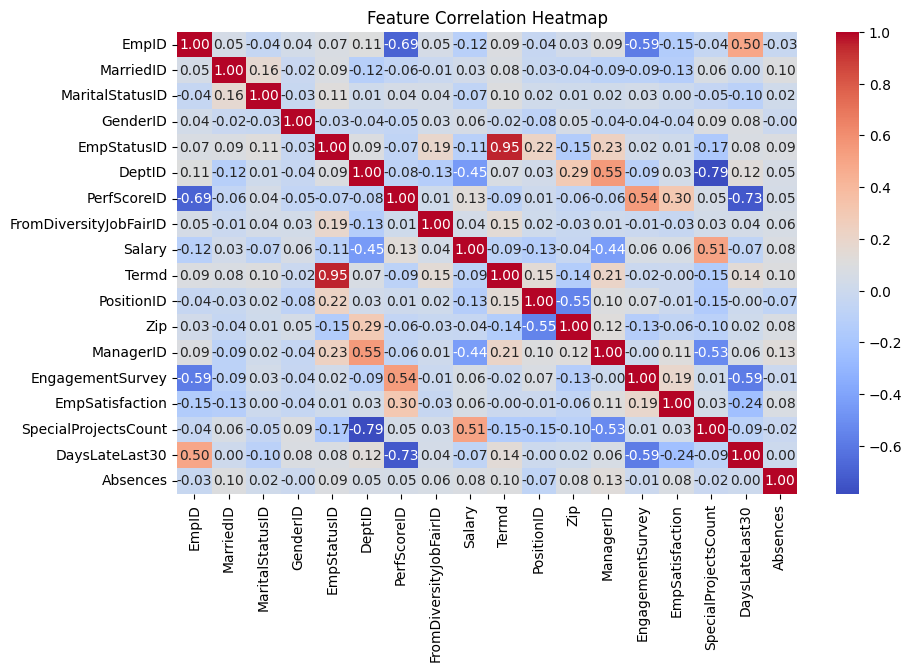

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

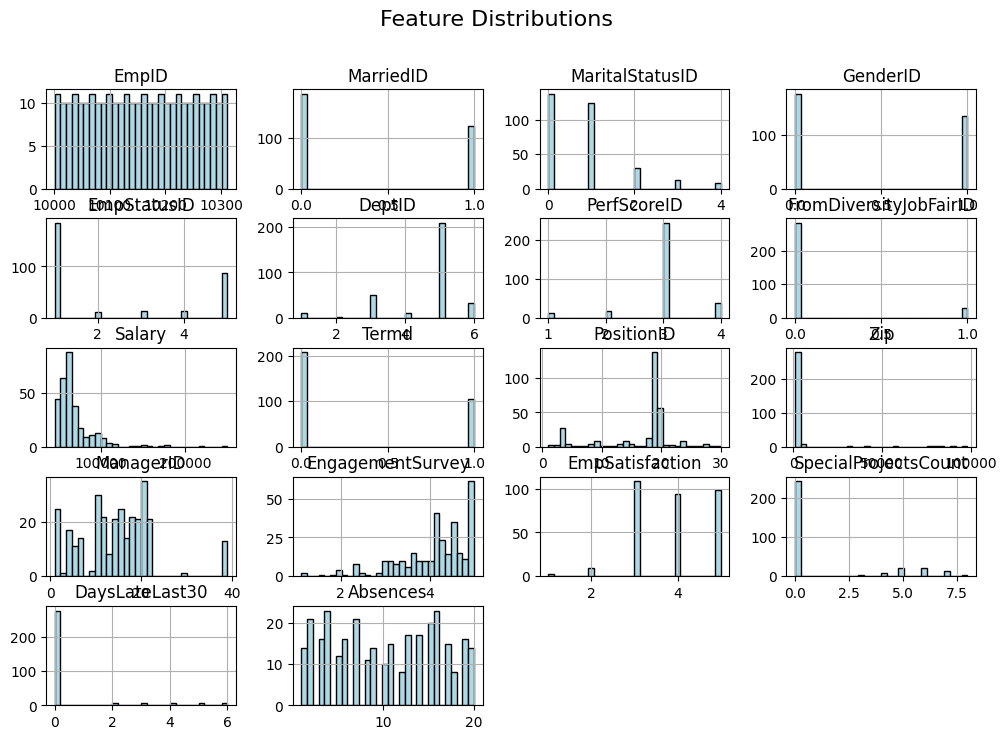

In [ ]:
# Feature Distributions
df.hist(figsize=(12, 8), bins=30, color='lightblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

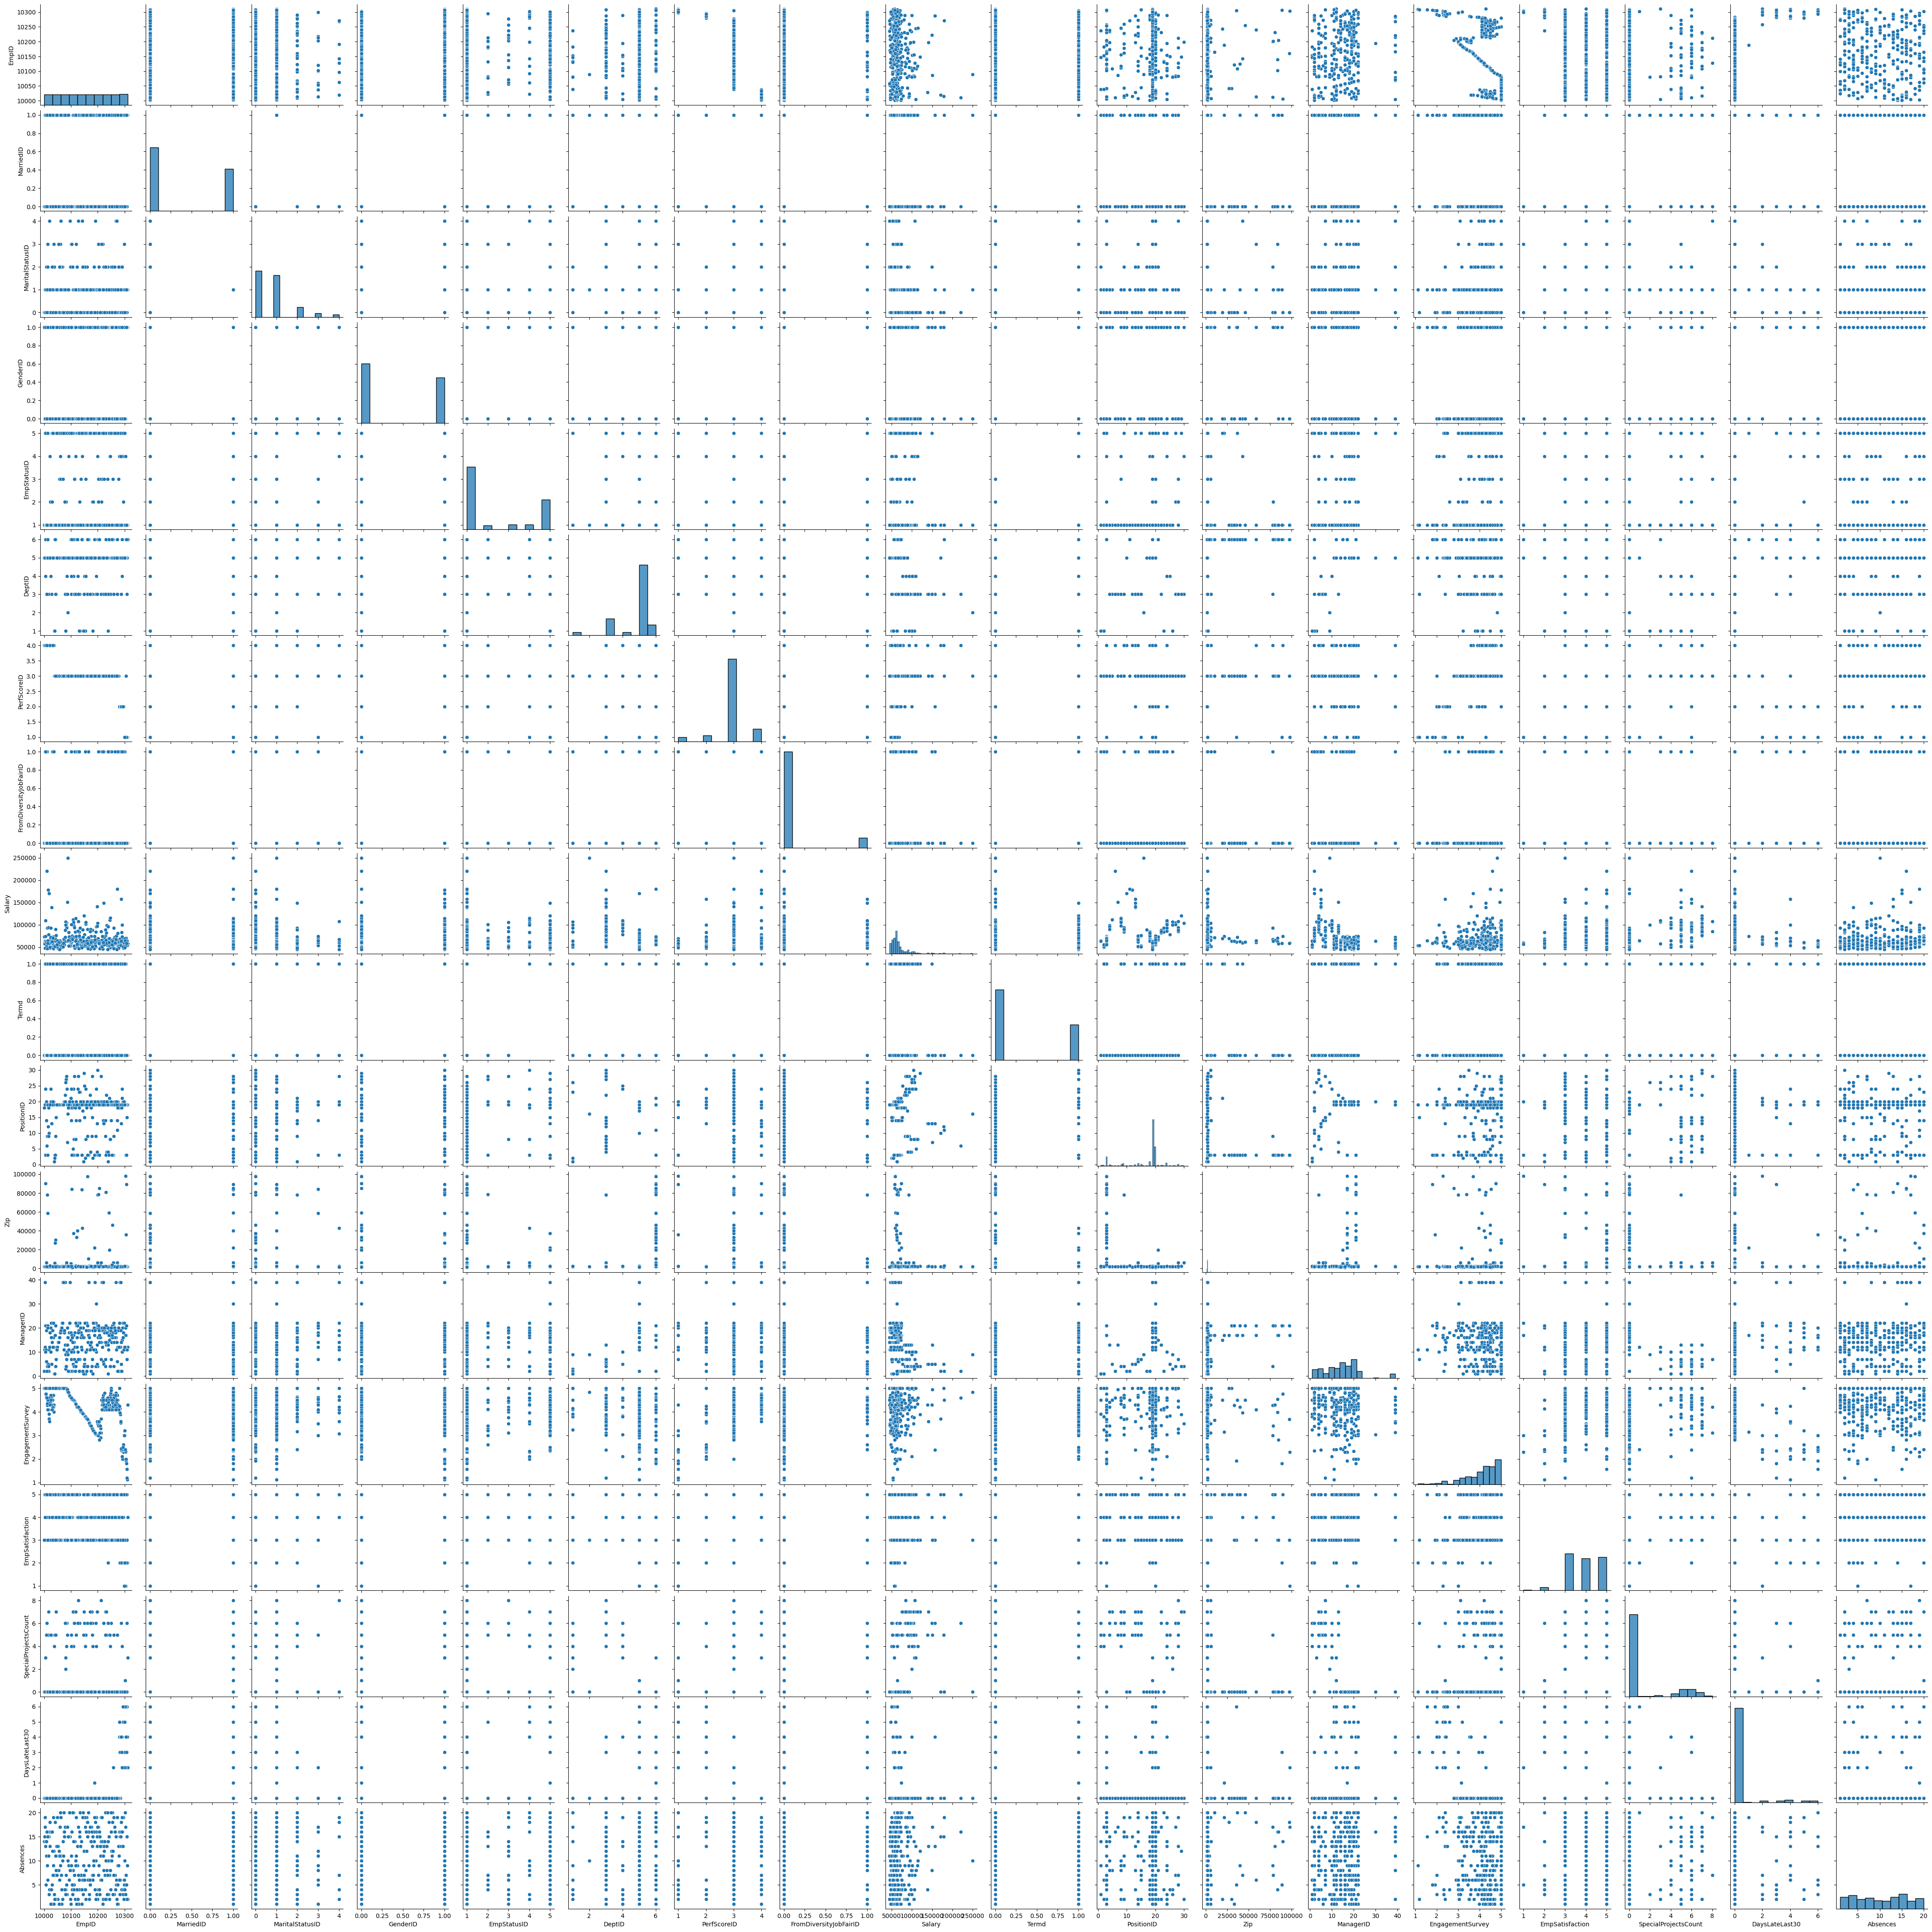

In [ ]:

# Pairplot to explore relationships (Only for small datasets)
sns.pairplot(df)
plt.show()

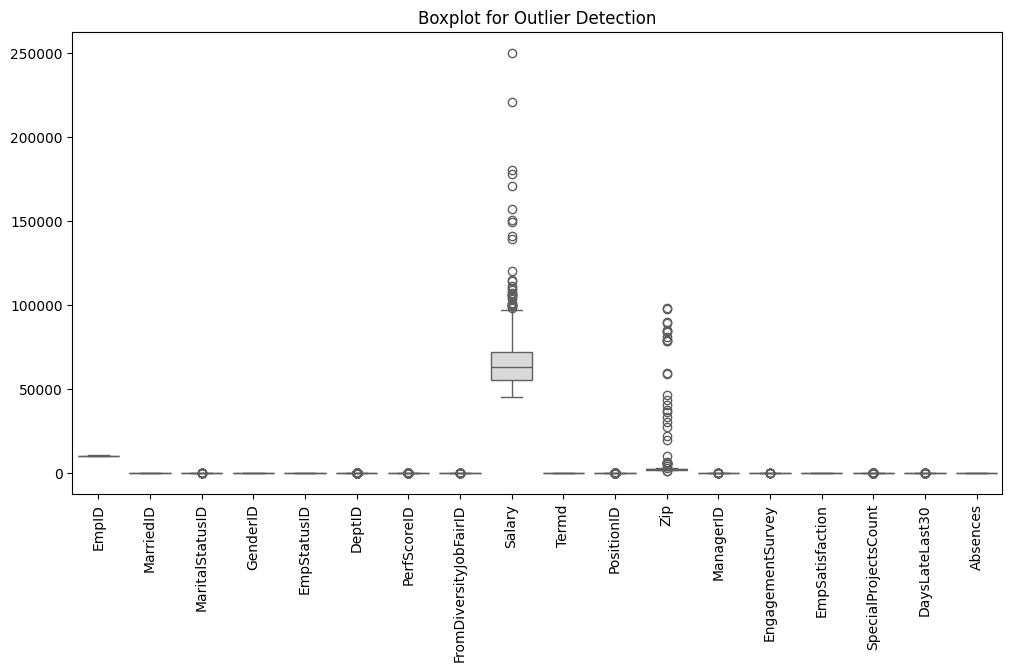

In [ ]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
# Choosing an appropriate target column
target_column = 'Salary'

In [ ]:
#Data Preprocessing
# Handle missing values
df.dropna(inplace=True)

In [ ]:
# Convert categorical columns to numeric if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Splitting dataset into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize or normalize features (X_train and X_test)
scaler_X = StandardScaler()  # Or use MinMaxScaler for normalization
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)


In [ ]:
# Build Linear Regression from Scratch (with L2 regularization)
def linear_regression(X, y, alpha=0.01, iterations=1000, lambda_reg=0.1):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        # Add L2 regularization term to the update rule
        theta -= (alpha/m) * (X.T @ errors + lambda_reg * theta)
    return theta

X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = linear_regression(X_train_bias, y_train, alpha=0.001, lambda_reg=0.1)  # Adjust alpha and lambda_reg

def predict(X, theta):
    return X @ theta

y_pred_custom = predict(np.c_[np.ones((X_test.shape[0], 1)), X_test], theta)
print("Custom Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_custom))
print("R2 Score:", r2_score(y_test, y_pred_custom))

Custom Linear Regression Performance:
MSE: 1.5298264106999035
R2 Score: 0.3573389234755565


In [ ]:
# Train ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"\n{name} Performance:")
    print("MSE:", mse)
    print("R2 Score:", r2)


Linear Regression Performance:
MSE: 1.5586951522140922
R2 Score: 0.34521152368061747

Ridge Regression Performance:
MSE: 1.4154813478064916
R2 Score: 0.4053738643684357

Lasso Regression Performance:
MSE: 2.6882524702280244
R2 Score: -0.12930147786887436

Decision Tree Performance:
MSE: 0.6622351546412069
R2 Score: 0.7218032357021877

Random Forest Performance:
MSE: 0.9100836853246218
R2 Score: 0.6176851459437998


In [ ]:
# Hyperparameter Optimization using GridSearchCV
param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"\nBest parameters for {name}: {grid_search.best_params_}")


Best parameters for Ridge Regression: {'alpha': 10}

Best parameters for Lasso Regression: {'alpha': 0.1}

Best parameters for Decision Tree: {'max_depth': 3}

Best parameters for Random Forest: {'n_estimators': 100}


In [ ]:
# Feature Selection using Recursive Feature Elimination (RFE)
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("\nSelected Features:", selected_features)


Selected Features: Index(['Position', 'Department', 'ManagerName', 'ManagerID',
       'SpecialProjectsCount'],
      dtype='object')


In [ ]:
# Final Model Evaluation
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"\nFinal {name} Model Performance:")
    print("MSE:", mse)
    print("R2 Score:", r2)


Final Ridge Regression Model Performance:
MSE: 1.4512188968826158
R2 Score: 0.39036096381908536

Final Lasso Regression Model Performance:
MSE: 1.131407707440842
R2 Score: 0.5247096728318825

Final Decision Tree Model Performance:
MSE: 0.6238738523045851
R2 Score: 0.737918342412402

Final Random Forest Model Performance:
MSE: 0.9535305568673754
R2 Score: 0.5994336547667642


In [ ]:
# Conclusion
print("\nConclusion: Model Performance Summary")
for name, results in model_results.items():
    print(f"{name}: MSE = {results['MSE']}, R2 Score = {results['R2 Score']}")

best_model = max(best_models, key=lambda name: model_results[name]["R2 Score"])
print(f"\nThe best performing model based on R2 Score is: {best_model}")


Conclusion: Model Performance Summary
Linear Regression: MSE = 1.5586951522140922, R2 Score = 0.34521152368061747
Ridge Regression: MSE = 1.4512188968826158, R2 Score = 0.39036096381908536
Lasso Regression: MSE = 1.131407707440842, R2 Score = 0.5247096728318825
Decision Tree: MSE = 0.6238738523045851, R2 Score = 0.737918342412402
Random Forest: MSE = 0.9535305568673754, R2 Score = 0.5994336547667642

The best performing model based on R2 Score is: Decision Tree
